In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


# Load the dataset
file_path = '/content/UltimateClassicRockDataset.csv'
df = pd.read_csv(file_path)

# Convert 'Duration' from 'MM:SS' to seconds
def convert_duration(duration):
    minutes, seconds = map(int, duration.split(':'))
    return minutes * 60 + seconds

df['Duration'] = df['Duration'].apply(convert_duration)

# Handle missing values if any (optional step)
df = df.dropna()

# Select numeric features for clustering
numeric_df = df.select_dtypes(include=[np.number])

# Separate features and target variable
X = numeric_df.drop(columns=['Popularity'])
y = numeric_df['Popularity']

# 1. Data Preprocessing - Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)






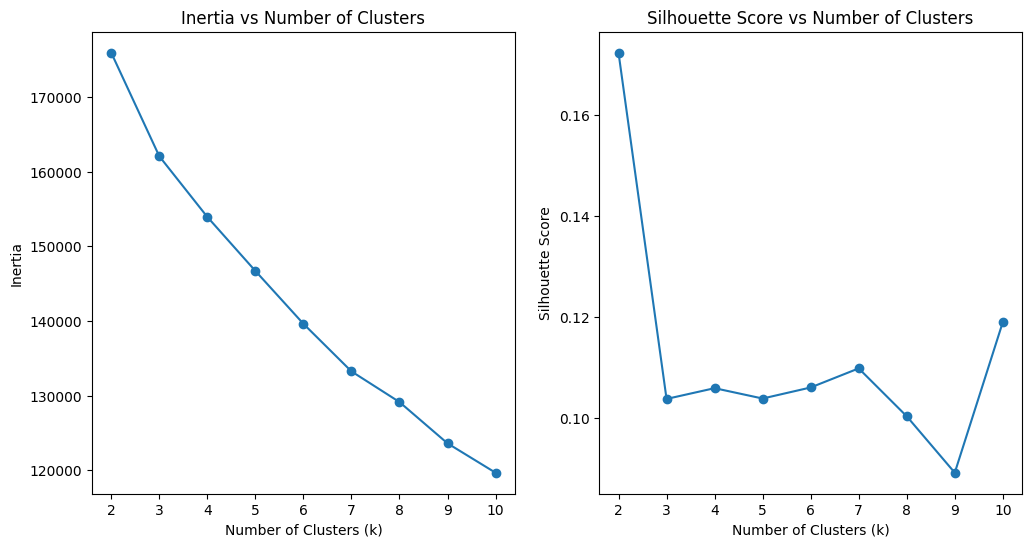

In [6]:
# 2. K-Means Clustering - Determine optimal k
inertia = []
silhouette_scores = []

# Try different numbers of clusters (k)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the inertia and silhouette scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [7]:
# 3. Apply K-Means with the optimal number of clusters (assuming k=4 from the silhouette analysis)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

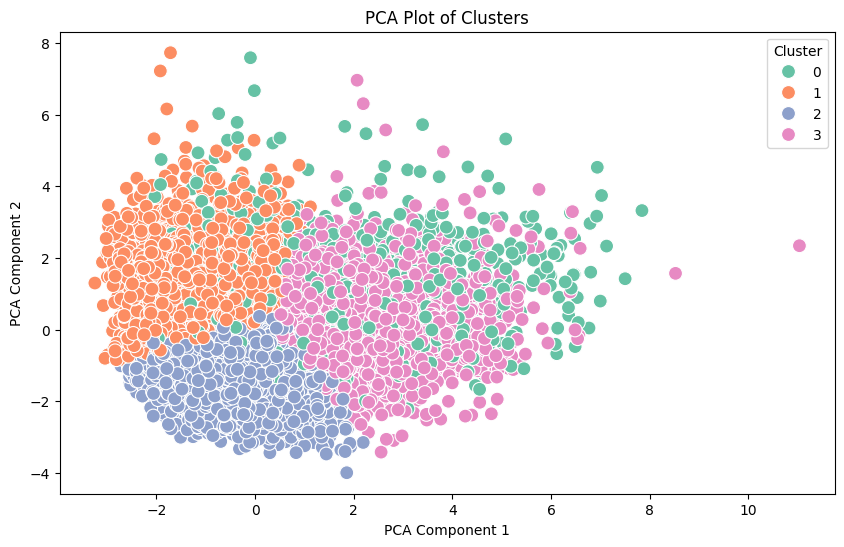

In [8]:
# 4. Visualization - PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('PCA Plot of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [9]:

# 5. Analyze Cluster Characteristics - Select numeric columns for aggregation
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Group by clusters and calculate means for numeric columns
cluster_means = df.groupby('Cluster')[numeric_columns].mean()
print(cluster_means)


                Year    Duration  Time_Signature  Danceability    Energy  \
Cluster                                                                    
0        1983.662587  265.872378        3.895979      0.427323  0.582406   
1        1996.535883  288.535453        3.936829      0.430856  0.821762   
2        1983.547183  239.300323        3.989595      0.600816  0.696313   
3        1983.006238  253.967498        3.765594      0.462952  0.359265   

              Key   Loudness      Mode  Speechiness  Acousticness  \
Cluster                                                             
0        5.247378 -12.316628  0.658217     0.051200      0.332270   
1        5.245380  -6.469747  0.671251     0.065967      0.066969   
2        5.133297  -9.281200  0.773233     0.043581      0.166498   
3        5.076822 -13.182202  0.768221     0.043308      0.542334   

         Instrumentalness  Liveness   Valence       Tempo  Popularity  Cluster  
Cluster                                        